# (branch) basic KNN (K=1, 3)

KNN (K=1) 评测完成，得分：0.68428 <br />
KNN (K=3) 评测完成，得分：0.72187 (噢 這個要訓練快3.5個小時)

## Stochastic_w6_1016_v3.0
modified from Stochastic_w6_1016_v2.0
有時候也還是很好奇，要怎麼把這份資料看成是一份股票的資料， <br />
Label的0跟1，是買賣? 還是漲跌? <br />
(困惑的第六週，不過其實這題目，我們也只能玩到第12週)

換行是br/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import pylab
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

date="1013"

train_ini_00 = pd.read_csv("./stock_train_data_2017"+date+".csv", sep=',', delimiter=None)
test_ini_00 = pd.read_csv("./stock_test_data_2017"+date+".csv", sep=',', delimiter=None)

最近總是要少一組feature <br/>
上一次少了feature['feature77']，這一次少了['feature43']

In [14]:
train_ini_00['feature43']=np.zeros(len(train_ini_00))
test_ini_00['feature43']=np.zeros(len(test_ini_00))

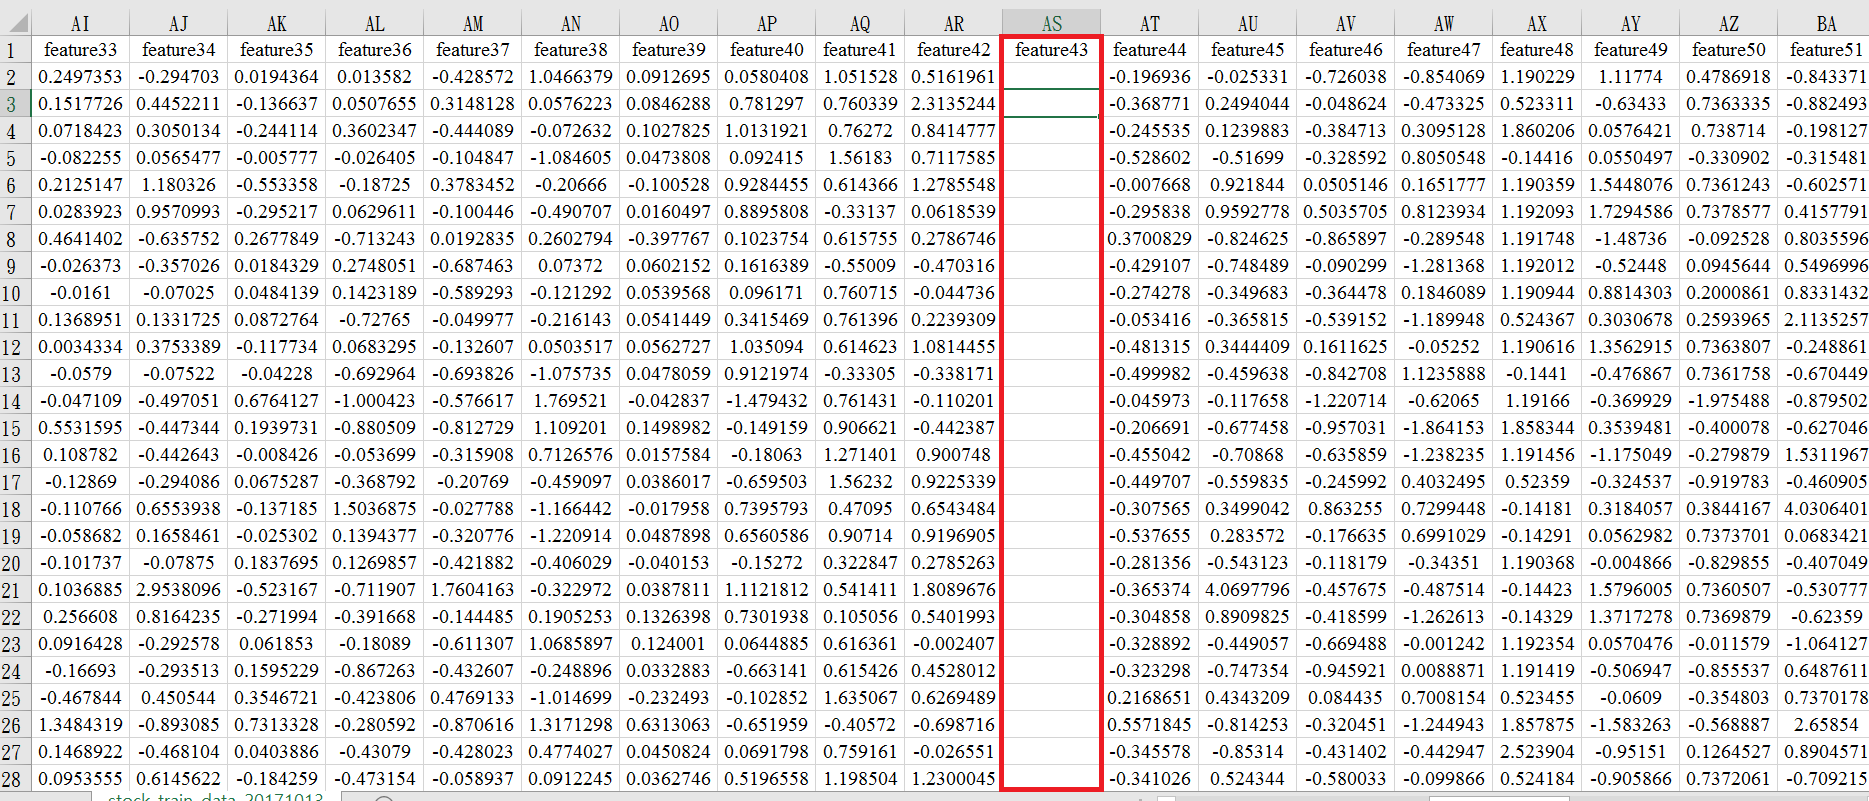

In [15]:
from PIL import Image
file = Image.open("img.png")
file

In [16]:
from sklearn.preprocessing import normalize

from sklearn import preprocessing

train_ini=train_ini_00.copy(deep=True)
test_ini=test_ini_00.copy(deep=True)

for i in range(1,89,1):
    train_ini.iloc[:,i]=preprocessing.scale(train_ini.iloc[:,i])
    test_ini.iloc[:,i]=preprocessing.scale(test_ini.iloc[:,i]) 

In [17]:
weightmean=train_ini.iloc[:,89].mean()

In [18]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

In [19]:
weightmean

3.948720233851419

In [21]:
np.array(train_ini['weight']/weightmean)

array([ 2.27921946,  1.01298643,  2.53246607, ...,  0.25324661,
        0.75973982,  0.25324661])

group: (1,28) -> (0,27) <br/>
重新標記group, [1,28]->[0,27], 平移一位 (資工的code喜歡從0開始)

In [27]:
test_ini['group']=test_ini['group']-1
train_ini['group']=train_ini['group']-1

# onehot

onehot的想法聽從孫民老師的建議，<br/>
原本是打算直接把group normalize之後丟進去，<br/>
然而，group1跟group2之間有什麼關係呢?

In [28]:
from keras.utils import np_utils
group_test_OneHot = np_utils.to_categorical(test_ini['group'], num_classes=max(test_ini['group'])+1)
group_train_OneHot = np_utils.to_categorical(train_ini['group'], num_classes=max(train_ini['group'])+1)

In [29]:
group_train_OneHot[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [31]:
import pandas
train_array_ini=pandas.DataFrame.as_matrix(train_ini)
test_array_ini=pandas.DataFrame.as_matrix(test_ini)

In [32]:
train_array_ini.shape

(280520, 93)

In [33]:
test_array_ini.shape

(198045, 90)

# 資料預處理 (把不要的column拿掉)
ndarray 可以直接copy (copy value)

## train

In [34]:
train_array=train_array_ini.copy()
test_array=test_array_ini.copy()

In [35]:
train_array=np.delete(train_array, numpy.s_[89:93], 1)
train_array=np.delete(train_array, 0, 1)

剩下88個feature (把ID、group先拿掉)

In [36]:
train_array.shape 

(280520, 88)

## test

In [38]:
test_array=np.delete(test_array, 89, 1)
test_array=np.delete(test_array, 0, 1)

In [39]:
test_array.shape

(198045, 88)

# 加入onehot (把剛才算好的onehot加進去)
feature數量: 88->88+28

In [40]:
group_train_OneHot.shape

(280520, 28)

In [41]:
group_test_OneHot.shape

(198045, 28)

In [42]:
train_array1=np.concatenate((train_array, group_train_OneHot), axis=1)
test_array1=np.concatenate((test_array, group_test_OneHot), axis=1)

In [45]:
print (train_array1.shape)
print (test_array1.shape)

(280520, 116)
(198045, 116)


In [46]:
train_array1=preprocessing.scale(train_array1)
test_array1=preprocessing.scale(test_array1)

# 儲存onehot後的結果

In [47]:
>>> np.save('train_array1', train_array1)
>>> np.save('test_array1', test_array1)

my_onehot function

In [114]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
def my_onehot(t):
    # define example
    data = t
    data = array(data)
    #print(data)
    # one hot encode
    encoded = to_categorical(data)
    #print(encoded)
    # invert encoding
    inverted = argmax(encoded[0])
    #print(inverted)
    return encoded

感覺有種跟昨天的自己學習的味道

In [117]:
X_traning=np.load('train_array1.npy')
X_test=np.load('test_array1.npy')
Y_traning=my_onehot(pandas.DataFrame.as_matrix(train_ini_00['label']))

In [118]:
print (X_traning.shape)
print (X_test.shape)
print (Y_traning.shape)

(280520, 116)
(198045, 116)
(280520, 2)


# 試試github的範例(兜兜看) <br/>
https://github.com/Mujadded/knn-with-tensorflow/blob/master/k-nearest.py

In [120]:
from __future__ import print_function
import tensorflow as tf
import numpy as np

In [124]:
#importing the data
#mnist=read_data_sets("data",one_hot=True)

#saving the datasets A.K.A Traning
#X_traning,Y_traning=mnist.train.next_batch(5000)
#X_test,Y_test=mnist.test.next_batch(200)

#placeholders for variable to be used in model
#xtr=tf.placeholder(tf.float32,[None,28*28]) #traning input
#ytr=tf.placeholder(tf.float32,[None,10]) #traning label
#xte=tf.placeholder(tf.float32,[28*28]) #testing input

xtr=tf.placeholder(tf.float32,[None,116]) #traning input
ytr=tf.placeholder(tf.float32,[None,2]) #traning label
xte=tf.placeholder(tf.float32,[116])#testing input

#K-near
K=3 #how many neighbors
nearest_neighbors=tf.Variable(tf.zeros([K]))

#model
distance = tf.negative(tf.reduce_sum(tf.abs(tf.subtract(xtr, xte)),axis=1)) #L1
# the negitive above if so that top_k can get the lowest distance *_* its a really good hack i learned
values,indices=tf.nn.top_k(distance,k=K,sorted=False)

#a normal list to save
nn = []
for i in range(K):
    nn.append(tf.argmax(ytr[indices[i]], 0)) #taking the result indexes

In [125]:
#saving list in tensor variable
nearest_neighbors=nn
# this will return the unique neighbors the count will return the most common's index
y, idx, count = tf.unique_with_counts(nearest_neighbors)

pred = tf.slice(y, begin=[tf.argmax(count, 0)], size=tf.constant([1], dtype=tf.int64))[0]

In [140]:
my_result=[]
# this is tricky count returns the number of repetation in each elements of y and then by begining from that and size begin 1
# it only returns that neighbors value : for example
# suppose a is array([11,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  4,  4,  4,  4]) so unique_with_counts of a will
#return y= (array([ 1,  2,  3,  4, 11]) count= array([3, 3, 2, 7, 1])) so argmax of count will be 3 which will be the
#index of 4 in y which is the hight number in a

#setting accuracy as 0
accuracy=0

#initialize of all variables
init=tf.global_variables_initializer()

#start of tensor session
with tf.Session() as sess:

    for i in range(X_test.shape[0]):
        #return the predicted value
        predicted_value=sess.run(pred,feed_dict={xtr:X_traning,ytr:Y_traning,xte:X_test[i,:]})
        my_result.append(predicted_value)
        if i%1000==0:
            #print("Test",i,"Prediction",predicted_value)
            print("Test",i,"/",X_test.shape[0])
        #if predicted_value == np.argmax(Y_test[i]):
            # if the prediction is right then a double value of 1./200 is added 200 here is the number of test
                #accuracy += 1. / len(X_test)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    writer.close()
    # tensorboard --logdir="./graphs" --port 6006 in command promt to see the graph at localhost:6006
    print("Calculation completed ! ! ")
    #print(K,"-th neighbors' Accuracy is:",accuracy)

Test 0 / 198045
Test 1000 / 198045
Test 2000 / 198045
Test 3000 / 198045
Test 4000 / 198045
Test 5000 / 198045
Test 6000 / 198045
Test 7000 / 198045
Test 8000 / 198045
Test 9000 / 198045
Test 10000 / 198045
Test 11000 / 198045
Test 12000 / 198045
Test 13000 / 198045
Test 14000 / 198045
Test 15000 / 198045
Test 16000 / 198045
Test 17000 / 198045
Test 18000 / 198045
Test 19000 / 198045
Test 20000 / 198045
Test 21000 / 198045
Test 22000 / 198045
Test 23000 / 198045
Test 24000 / 198045
Test 25000 / 198045
Test 26000 / 198045
Test 27000 / 198045
Test 28000 / 198045
Test 29000 / 198045
Test 30000 / 198045
Test 31000 / 198045
Test 32000 / 198045
Test 33000 / 198045
Test 34000 / 198045
Test 35000 / 198045
Test 36000 / 198045
Test 37000 / 198045
Test 38000 / 198045
Test 39000 / 198045
Test 40000 / 198045
Test 41000 / 198045
Test 42000 / 198045
Test 43000 / 198045
Test 44000 / 198045
Test 45000 / 198045
Test 46000 / 198045
Test 47000 / 198045
Test 48000 / 198045
Test 49000 / 198045
Test 50000 / 

In [141]:
import numpy
amy_result=numpy.asarray(my_result)

In [142]:
amy_result.shape
np.save('amy_result', amy_result)

In [144]:
amy_resultX = np.load('amy_result.npy')

In [146]:
amy_resultX.shape

(198045,)

In [147]:
result = pd.read_csv("./upload.csv", sep=',', delimiter=None)

In [150]:
result['proba']=amy_resultX

In [152]:
result['proba2']=1-amy_resultX

In [155]:
err=0.37

In [156]:
result['proba3']=amy_resultX*(1.0-err)+(1-amy_resultX)*err

In [157]:
result['proba3']

0         0.63
1         0.37
2         0.37
3         0.63
4         0.63
5         0.63
6         0.37
7         0.37
8         0.63
9         0.63
10        0.63
11        0.63
12        0.63
13        0.63
14        0.37
15        0.37
16        0.37
17        0.63
18        0.63
19        0.63
20        0.37
21        0.37
22        0.63
23        0.37
24        0.63
25        0.37
26        0.63
27        0.63
28        0.37
29        0.37
          ... 
198015    0.63
198016    0.63
198017    0.63
198018    0.37
198019    0.63
198020    0.63
198021    0.63
198022    0.63
198023    0.37
198024    0.63
198025    0.63
198026    0.37
198027    0.63
198028    0.63
198029    0.37
198030    0.63
198031    0.37
198032    0.63
198033    0.63
198034    0.37
198035    0.63
198036    0.63
198037    0.63
198038    0.37
198039    0.37
198040    0.37
198041    0.37
198042    0.63
198043    0.63
198044    0.63
Name: proba3, Length: 198045, dtype: float64

In [158]:
result.to_csv("result_knn_kequall3.csv", sep=',', encoding='utf-8')

KNN (K=3) <br/>
评测完成，得分：0.72187 

=======================================================

In [94]:
X_traning.shape

(5000, 784)

In [95]:
Y_traning.shape

(5000, 10)

In [98]:
X_test.shape

(200, 784)

In [99]:
Y_test.shape

(200, 10)

In [100]:
Y_test.shape

(200, 10)

=======================================================

# K=1的KNN
只看最近的那個鄰居<br/>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [51]:
y=pandas.DataFrame.as_matrix(train_ini_00['label'])
X = np.load('train_array1.npy')

In [52]:
>>> from sklearn.neighbors.nearest_centroid import NearestCentroid
>>> import numpy as np
>>> clf = NearestCentroid()
>>> clf.fit(X, y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [53]:
a=clf.predict(yy)

In [54]:
a.shape

(198045,)

upload檔案自行建置 <br/>
建構方式： <br/>
1. 將test data copy 一份
2. 將ID以外的全部都刪掉
3. 命名一行名為proba

In [55]:
result = pd.read_csv("./upload.csv", sep=',', delimiter=None)

# 參考slack，設定err=0.37
有人算出一個安全區間[1/e,1-1/e]，也就是大約【0.37，0.63】，把值規整到這個區間內，就可以通過反作弊系統了。<br/>
https://aichallenger.slack.com/messages/C703ZH2HK/convo/C703ZH2HK-1507709903.000428/

如果直接丟一堆0跟1，經常會被防作弊吃掉 (預測結果過於極端)

In [58]:
err=0.37
result['proba']=a*(1.0-err)+(1-a)*err
result.to_csv("result.csv", sep=',', encoding='utf-8')

下載下來後，記得要手動刪除excel的第一欄 <br/>
(這我也還沒想到怎麼處理它)

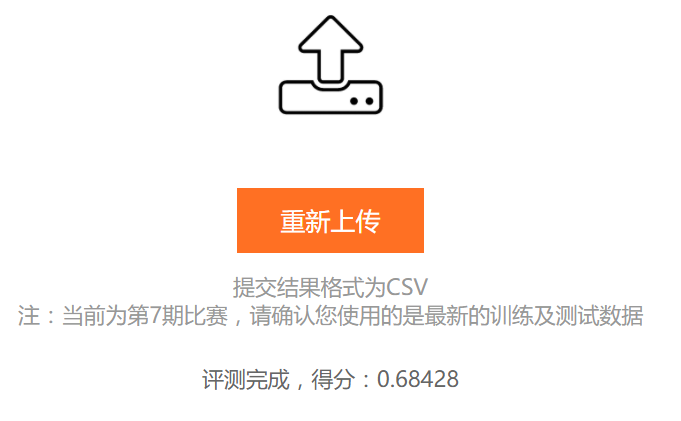

In [59]:
from PIL import Image
file = Image.open("img2.png")
file

這次結果還不錯呢!!!

===========================================================

===========================================================

來試試看吧

=======================================================

In [74]:
sess = tf.Session()
prediction_outcome = sess.run(prediction, feed_dict={x_data_train: x_vals_train,
                               x_data_test: x_vals_test,
                               y_data_train: y_vals_train})

# evaluation
accuracy = 0
for pred, actual in zip(prediction_outcome, y_vals_test):
    if pred == np.argmax(actual):
        accuracy += 1

print(accuracy / len(prediction_outcome))

0.9666666666666667


In [76]:
prediction_outcome.shape

(30,)

In [78]:
prediction.shape

TensorShape([Dimension(None)])

In [26]:
test_save=[]
for BIGI in range(0,28,1):

    #testxx=test_ini.sort_values('group')
    #testxx_list = []
    for i in range(len(testxx.group.unique())):
        testxx_list.append(testxx[testxx['group']==i+1])
    test=testxx_list[BIGI]

    trainxx=train_ini.sort_values('group')
    df_list = []
    for i in range(len(trainxx.group.unique())):
        df_list.append(trainxx[trainxx['group']==i+1])
    train=df_list[BIGI]

    model = Sequential()
    model.add(Dense(units=50,input_dim=88,kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(units=20, activation='sigmoid'))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.2))
    #model.add(Dense(50))
    #model.add(Dense(50))
    #model.add(Dropout(0.4))
    #model.add(Dense(50))
    #model.add(Dropout(0.4))
    #model.add(Dense(50))
    
    #import functools
    #ncce=functools.partial(w_categorical_crossentropy, weights=np.array(train['weight']))

    #model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    trainx=train.copy(deep=True)
    testx=test.copy(deep=True)
    trainx.drop(['id', 'weight', 'label', 'era', 'group'],  axis=1, inplace=True )
    testx.drop(['id', 'group'], axis=1, inplace=True)
    
    x_Train_normalize = trainx.as_matrix()
    x_Test_normalize = testx.as_matrix()
    y_Train_Onehot_temp=train['label'].as_matrix()
    
    # Create label used for validation
    label_mat=train['label'].as_matrix()
    labels = [[1, 0] if label_mat[i] == 0 else [0, 1] for i in range(len(label_mat))]
    #labels = [[1, 0] if label_mat[i] == 0 else [0, 1] for i in range(len(label_mat))]
    
    
    #model.add(Dense(units=1,kernel_initializer='normal',activation='softmax'))
    model.add(Dense(units=2,kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #model.compile(loss=x_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
    
    #model.compile(loss='log_loss',optimizer='adam',metrics=['accuracy'])
    
    #model.load_weights(train['weight']);
    




    train_history=model.fit(x=x_Train_normalize,y=labels,validation_split=0.4,sample_weight=np.array(train['weight']), epochs=10, batch_size=40
                            , verbose=2)
    #train_history=model.fit(x=x_Train_normalize,y=labels,validation_split=0.4, epochs=10, batch_size=200, verbose=2)
    prediction=model.predict_classes(x_Test_normalize)
    proba=model.predict_proba(x_Test_normalize)[:,1];
    #proba=model.predict_proba(x_Test_normalize)[:,0];
    
    test = test.assign(proba=(pd.Series(proba)).values)
    #test = test.sort_values('id');
    test.drop(test.columns[1:90],  axis=1, inplace=True )

    test_save.append(test)
    
    print(model.summary())

Train on 6322 samples, validate on 4216 samples
Epoch 1/10
0s - loss: 2.6290 - acc: 0.4892 - val_loss: 2.5495 - val_acc: 0.5213
Epoch 2/10
0s - loss: 2.5827 - acc: 0.5096 - val_loss: 2.5356 - val_acc: 0.5242
Epoch 3/10
0s - loss: 2.5115 - acc: 0.5514 - val_loss: 2.5418 - val_acc: 0.5301
Epoch 4/10
0s - loss: nan - acc: 0.5785 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 5/10
0s - loss: 4.5573e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 6/10
0s - loss: 4.5636e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 7/10
0s - loss: 4.5670e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 8/10
0s - loss: 4.5621e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 9/10
0s - loss: 4.5535e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
Epoch 10/10
0s - loss: 4.5652e-07 - acc: 0.5141 - val_loss: 4.4817e-07 - val_acc: 0.4787
4064/6897 [================>.............] - ETA: 0s__________________________________________________

Train on 15271 samples, validate on 10182 samples
Epoch 1/10
0s - loss: 2.8967 - acc: 0.5560 - val_loss: 2.9865 - val_acc: 0.5545
Epoch 2/10
0s - loss: 2.7816 - acc: 0.5800 - val_loss: 3.0028 - val_acc: 0.5517
Epoch 3/10
0s - loss: 2.7178 - acc: 0.5882 - val_loss: 2.9542 - val_acc: 0.5572
Epoch 4/10
0s - loss: 2.6644 - acc: 0.5969 - val_loss: 2.9442 - val_acc: 0.5689
Epoch 5/10
0s - loss: 2.6259 - acc: 0.6058 - val_loss: 2.9641 - val_acc: 0.5581
Epoch 6/10
0s - loss: 2.5883 - acc: 0.6123 - val_loss: 2.9262 - val_acc: 0.5672
Epoch 7/10
0s - loss: 2.5574 - acc: 0.6171 - val_loss: 2.9099 - val_acc: 0.5736
Epoch 8/10
0s - loss: 2.5238 - acc: 0.6188 - val_loss: 2.9327 - val_acc: 0.5758
Epoch 9/10
0s - loss: 2.4976 - acc: 0.6264 - val_loss: 2.8817 - val_acc: 0.5872
Epoch 10/10
0s - loss: 2.4764 - acc: 0.6292 - val_loss: 2.9315 - val_acc: 0.5783
15808/17207 [==========================>...] - ETA: 0s_________________________________________________________________
Layer (type)                 

0s - loss: 2.8851 - acc: 0.5294 - val_loss: 2.9351 - val_acc: 0.5555
Epoch 2/10
0s - loss: 2.8360 - acc: 0.5600 - val_loss: 2.9114 - val_acc: 0.5605
Epoch 3/10
0s - loss: 2.7805 - acc: 0.5799 - val_loss: 2.9210 - val_acc: 0.5594
Epoch 4/10
0s - loss: 2.7082 - acc: 0.5946 - val_loss: 2.8734 - val_acc: 0.5693
Epoch 5/10
0s - loss: 2.6522 - acc: 0.5999 - val_loss: 2.9932 - val_acc: 0.5455
Epoch 6/10
0s - loss: 2.5842 - acc: 0.6077 - val_loss: 2.9441 - val_acc: 0.5516
Epoch 7/10
0s - loss: 2.5203 - acc: 0.6143 - val_loss: 2.8781 - val_acc: 0.5861
Epoch 8/10
0s - loss: 2.4737 - acc: 0.6233 - val_loss: 2.8715 - val_acc: 0.5793
Epoch 9/10
0s - loss: 2.4292 - acc: 0.6335 - val_loss: 2.8459 - val_acc: 0.5864
Epoch 10/10
0s - loss: 2.3766 - acc: 0.6366 - val_loss: 2.9160 - val_acc: 0.5939
3744/4529 [=======================>......] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)          

0s - loss: 2.8650 - acc: 0.5506 - val_loss: 2.9320 - val_acc: 0.5334
Epoch 3/10
0s - loss: 2.8041 - acc: 0.5734 - val_loss: 2.9123 - val_acc: 0.5408
Epoch 4/10
0s - loss: 2.7465 - acc: 0.5830 - val_loss: 2.9170 - val_acc: 0.5560
Epoch 5/10
0s - loss: 2.6840 - acc: 0.5990 - val_loss: 2.9105 - val_acc: 0.5569
Epoch 6/10
0s - loss: 2.6331 - acc: 0.6050 - val_loss: 2.9227 - val_acc: 0.5607
Epoch 7/10
0s - loss: 2.5983 - acc: 0.6130 - val_loss: 2.9271 - val_acc: 0.5591
Epoch 8/10
0s - loss: 2.5439 - acc: 0.6222 - val_loss: 2.9145 - val_acc: 0.5666
Epoch 9/10
0s - loss: 2.4964 - acc: 0.6255 - val_loss: 2.8927 - val_acc: 0.5673
Epoch 10/10
0s - loss: 2.4815 - acc: 0.6286 - val_loss: 2.9152 - val_acc: 0.5680
6944/8560 [=======================>......] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 50)                4450      
________________________________________

0s - loss: 3.2728 - acc: 0.5952 - val_loss: 3.2841 - val_acc: 0.5618
Epoch 4/10
0s - loss: 3.2019 - acc: 0.6042 - val_loss: 3.2617 - val_acc: 0.5745
Epoch 5/10
0s - loss: 3.1332 - acc: 0.6176 - val_loss: 3.2465 - val_acc: 0.5845
Epoch 6/10
0s - loss: 3.0843 - acc: 0.6202 - val_loss: 3.3235 - val_acc: 0.5790
Epoch 7/10
0s - loss: 3.0239 - acc: 0.6257 - val_loss: 3.2496 - val_acc: 0.5761
Epoch 8/10
0s - loss: 2.9837 - acc: 0.6283 - val_loss: 3.2808 - val_acc: 0.5800
Epoch 9/10
0s - loss: 2.9326 - acc: 0.6387 - val_loss: 3.2835 - val_acc: 0.5823
Epoch 10/10
0s - loss: 2.8932 - acc: 0.6377 - val_loss: 3.2560 - val_acc: 0.5948
 7040/10370 [===================>..........] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                4450      
_________________________________________________________________
dense_68 (Dense)             (None, 20)             

0s - loss: 1.8269 - acc: 0.5282 - val_loss: 2.0073 - val_acc: 0.5544
Epoch 5/10
0s - loss: 1.7737 - acc: 0.5745 - val_loss: 1.9990 - val_acc: 0.5382
Epoch 6/10
0s - loss: 1.7190 - acc: 0.5745 - val_loss: 1.9681 - val_acc: 0.5266
Epoch 7/10
0s - loss: 1.6580 - acc: 0.5907 - val_loss: 1.9735 - val_acc: 0.5359
Epoch 8/10
0s - loss: 1.5934 - acc: 0.6062 - val_loss: 1.9329 - val_acc: 0.5266
Epoch 9/10
0s - loss: 1.5246 - acc: 0.6286 - val_loss: 1.9187 - val_acc: 0.5382
Epoch 10/10
0s - loss: 1.4562 - acc: 0.6317 - val_loss: 1.9079 - val_acc: 0.5405
  32/1356 [..............................] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 50)                4450      
_________________________________________________________________
dense_83 (Dense)             (None, 20)                1020      
_________________________________________________________________
de

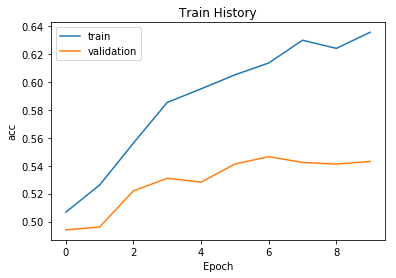

In [127]:
show_train_history(train_history,'acc','val_acc')

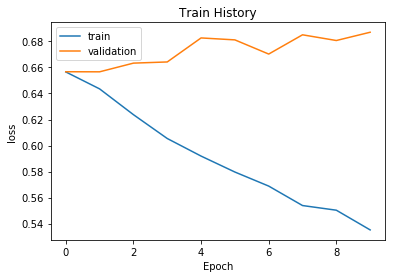

In [128]:
show_train_history(train_history,'loss','val_loss')

In [108]:
#output and save it

result = pd.concat(test_save)
result = result.sort_values('id');
result.to_csv("answer0916.csv", sep=',', encoding='utf-8')

In [109]:
result

,id,proba
10,296114,0.274826
17,296121,0.630054
39,296143,0.523555
59,296163,0.860920
147,296251,0.592742
186,296290,0.526093
221,296325,0.554894
234,296338,0.725277
243,296347,0.219134
255,296359,0.768725
